# Introduction

Analysing the Popularity of Different Programming Languages over Time.<br>
There are two datasets used in this analysis and was queried from [StackExchange.](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com):
1. From `01-07-2020` 
2. From `01-10-2023`<br>

First we look at the `2020` set

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('QueryResults_2020.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [4]:
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


What are the dimensions of the dataframe?

In [5]:
df.shape

(1991, 3)

The total number of post per language.
This raises the question: Which Programming language has had the highest total number of posts of all time?

In [6]:
df.groupby('TAG').sum().sort_values('POSTS', ascending=False)

,DATE,POSTS
TAG,,
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2056510
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1696403
python,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1496210
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1423530
php,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1361988
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,684210
r,2008-09-01 00:00:002008-11-01 00:00:002008-12-...,356799
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,336042
swift,2009-01-01 00:00:002009-02-01 00:00:002009-03-...,273055


It appears that `javascript` had the most number of post on Stackoverflow

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

Other questions could be:
1. How many months of data exist per language?
2. Which language had the fewest months with an entry? 


In [7]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [8]:
df.groupby('TAG').count().sort_values("DATE")

,DATE,POSTS
TAG,,
go,129,129
swift,135,135
r,142,142
assembly,144,144
c,144,144
c++,144,144
delphi,144,144
java,144,144
javascript,144,144


`Go` seems to be having the fewest months in an entry.

## Data Cleaning

Let's fix the date format to make it more readable.

In [9]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [10]:
type(df['DATE'][1])

str

In [11]:
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [12]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [13]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

In [14]:
reshaped_df.shape

(145, 14)

In [15]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


The number of entries per programming language:

In [16]:
reshaped_df.count() 

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [17]:
reshaped_df.fillna(0, inplace=True) 

In [18]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [19]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


### Java's Popularity

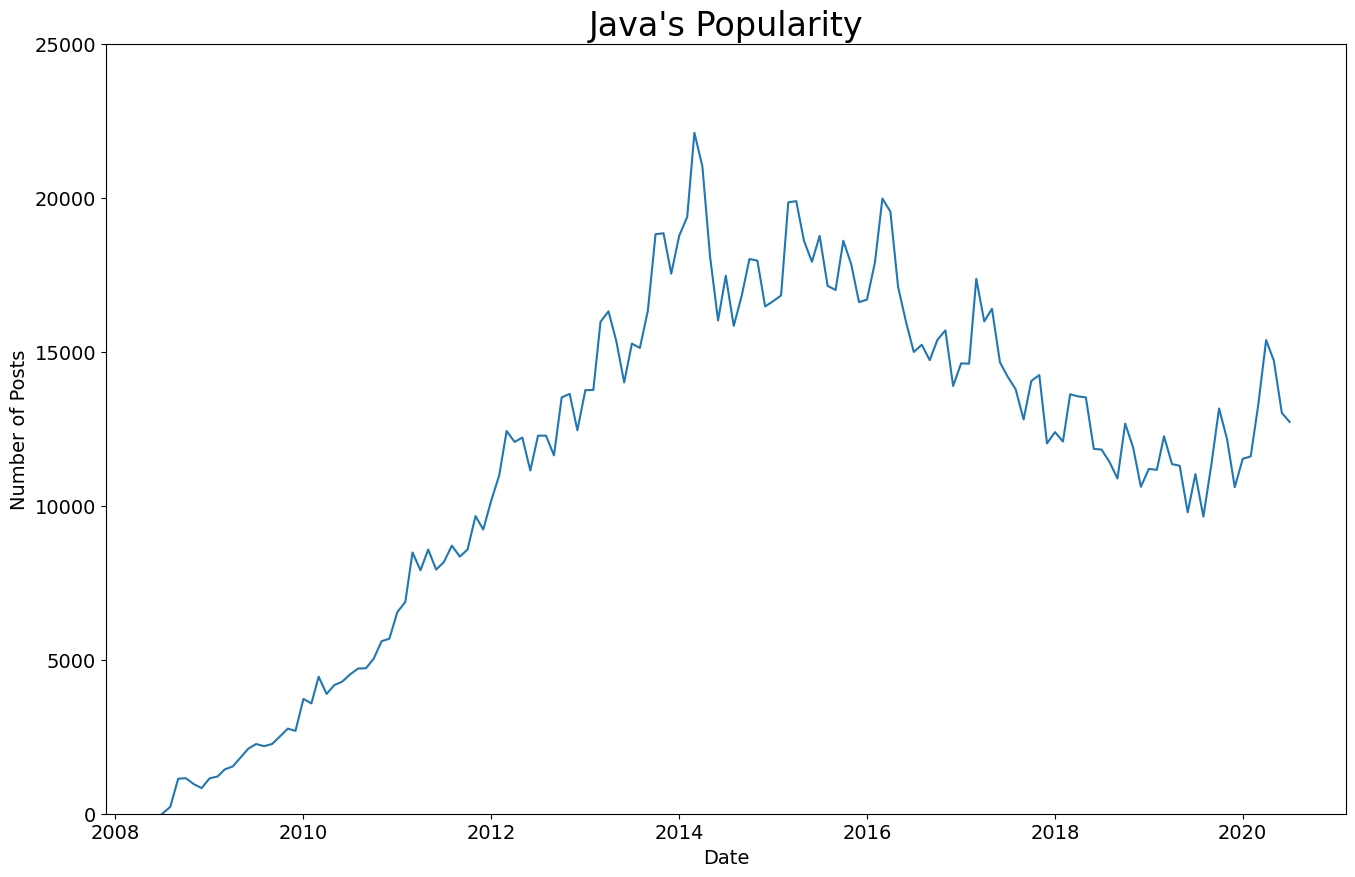

In [20]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 25000)
plt.title("Java's Popularity", fontsize=24)
plt.plot(reshaped_df.index, reshaped_df.java)

### Comparing Java and C++

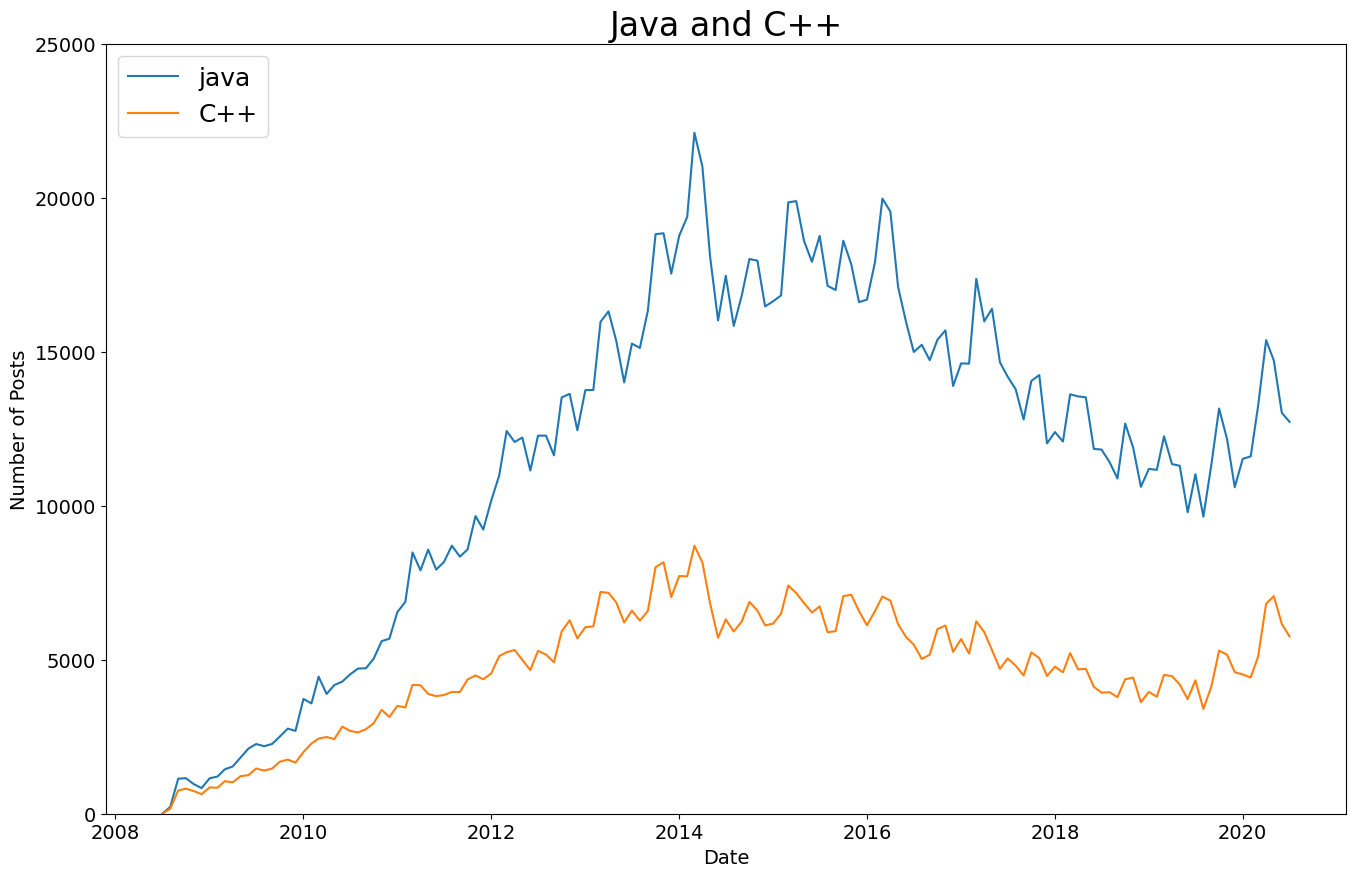

In [21]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 25000)
plt.title("Java and C++", fontsize=24)


plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df["c++"])

plt.legend(["java", "C++"], fontsize=18, loc ="upper left")


### Comparing all Languages

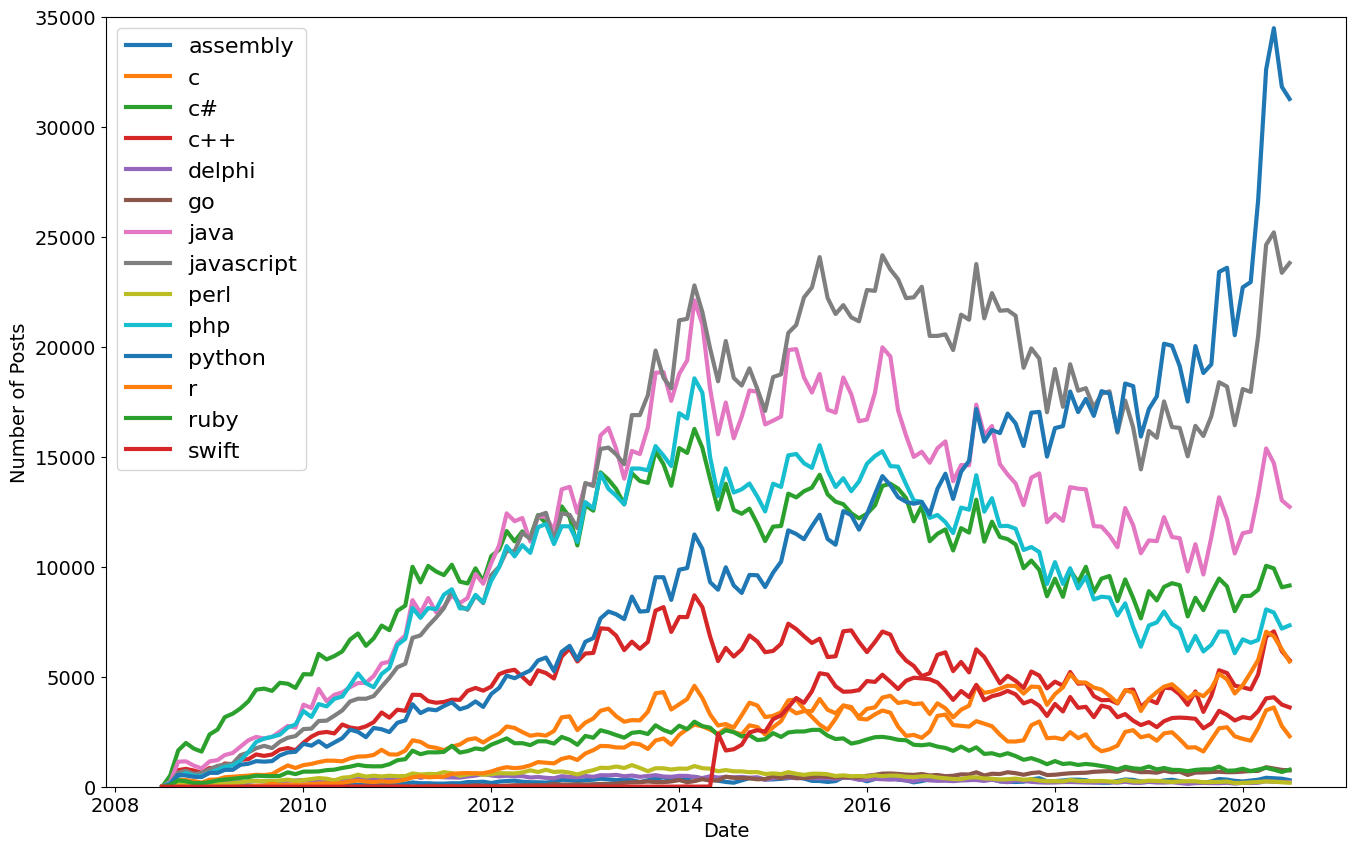

In [22]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend, lets do a rolling average of 6 observations. 

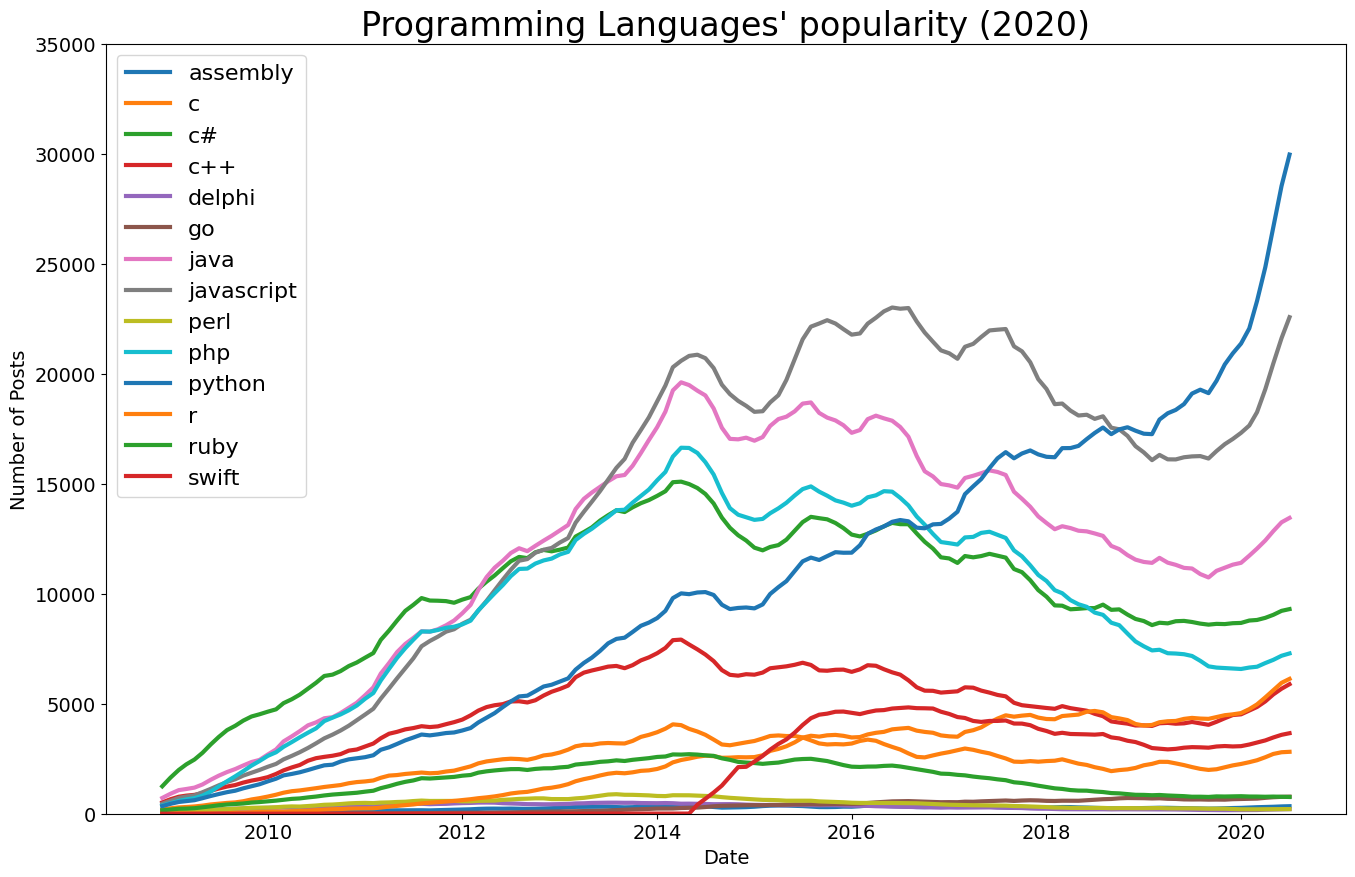

In [23]:
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.title("Programming Languages' popularity (2020)", fontsize=24)


for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

# Analysing the 2023 dataset

Now lets take a look at the 2023 dataset.

In [24]:
df_2023 = pd.read_csv('QueryResults_2023.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

In [25]:
df_2023

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164
...,...,...,...
2519,2023-09-01 00:00:00,php,2099
2520,2023-09-01 00:00:00,python,10306
2521,2023-09-01 00:00:00,r,2197
2522,2023-09-01 00:00:00,ruby,214


Fixing the Date format

In [26]:
df_2023.DATE = pd.to_datetime(df_2023.DATE)
df_2023.tail()

,DATE,TAG,POSTS
2519,2023-09-01,php,2099
2520,2023-09-01,python,10306
2521,2023-09-01,r,2197
2522,2023-09-01,ruby,214
2523,2023-09-01,swift,998


Reshaping The Dataframe:

In [27]:
reshaped_df_2023 = df_2023.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df_2023.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1640.0,754.0,104.0,NaN,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,610.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,955.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN


In [28]:
reshaped_df_2023.fillna(0, inplace=True)
reshaped_df_2023

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1640.0,754.0,104.0,0.0,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1731.0,734.0,141.0,0.0,955.0,580.0,97.0,499.0,449.0,1.0,157.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,174.0,1049.0,3835.0,1782.0,114.0,417.0,4183.0,7775.0,54.0,1971.0,11802.0,2866.0,255.0,998.0
2023-06-01,155.0,889.0,3815.0,1815.0,117.0,521.0,4295.0,7540.0,54.0,1906.0,11290.0,2667.0,226.0,1133.0
2023-07-01,163.0,919.0,3882.0,1858.0,99.0,526.0,4083.0,7559.0,69.0,1754.0,11191.0,2364.0,224.0,1158.0


### Visualising 2023 dataset

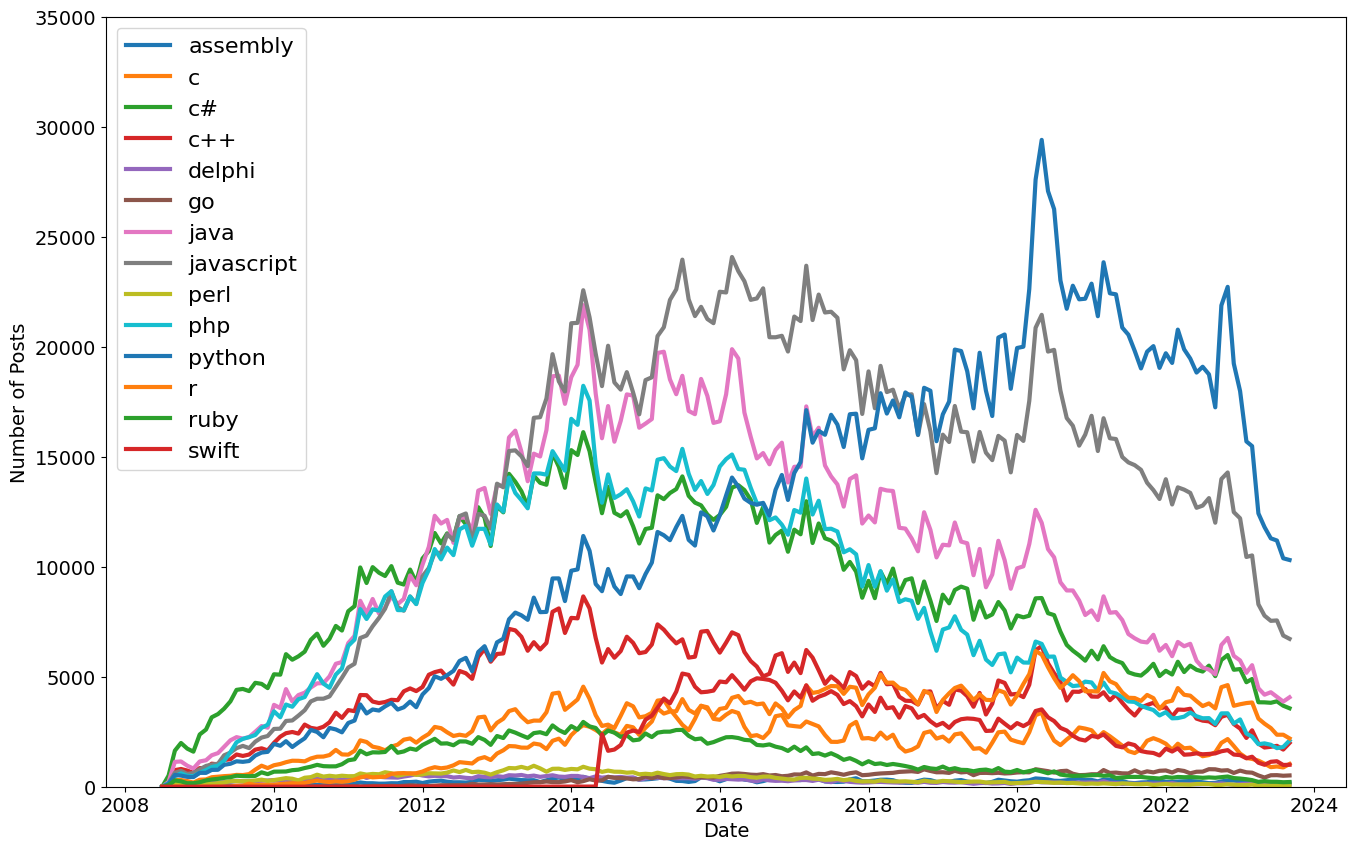

In [29]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df_2023.columns:
    plt.plot(reshaped_df_2023.index, reshaped_df_2023[column], 
             linewidth=3, label=reshaped_df_2023[column].name)

plt.legend(fontsize=16)

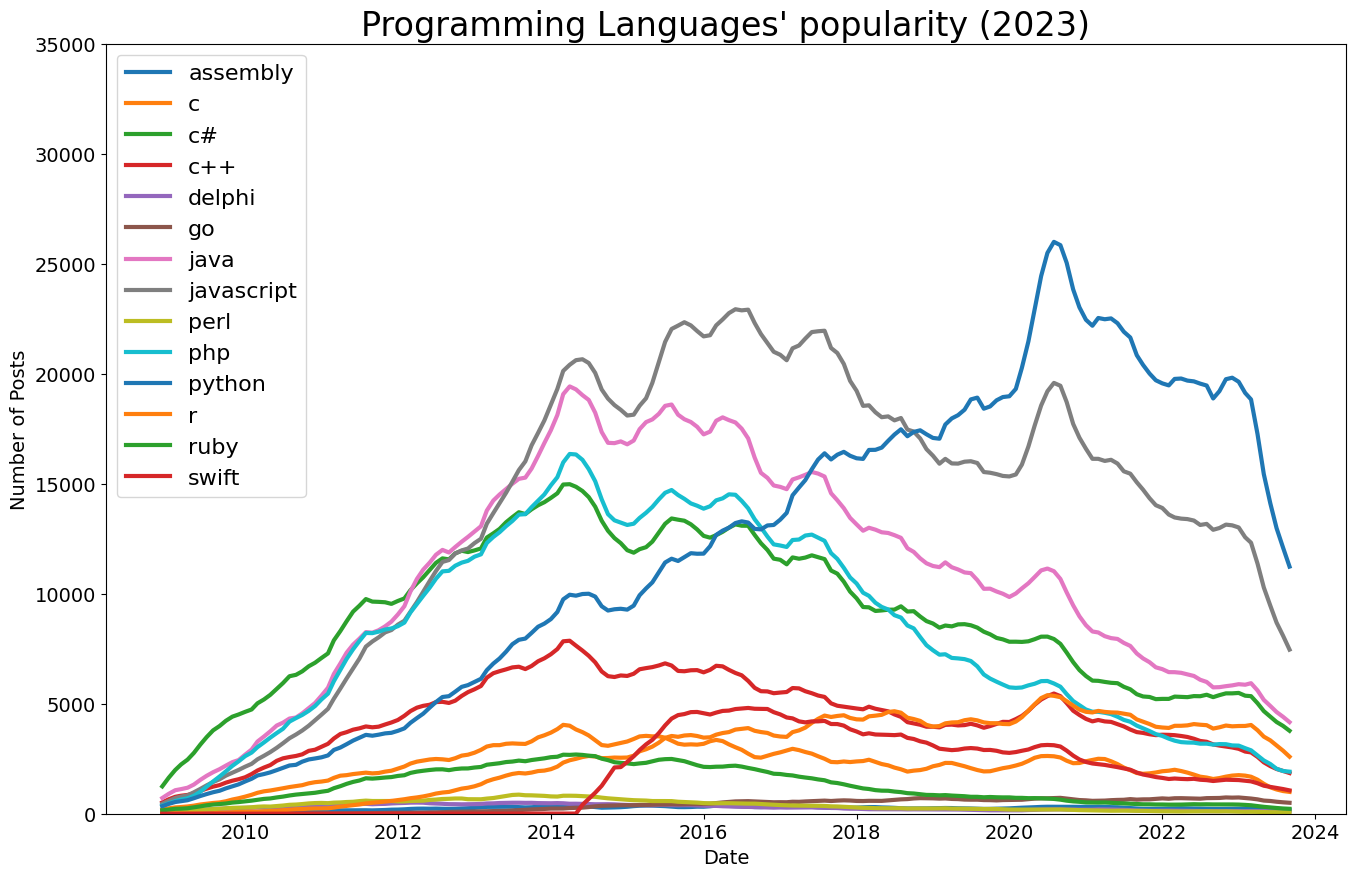

In [30]:
roll_df = reshaped_df_2023.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.title("Programming Languages' popularity (2023)", fontsize=24)


for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

Including the current data we can see that all of the graph lines are plumeting down. This is beacuse of the advent of chatbots like ChatGPT that can solve most of the devolopers problem without having to get mocked by stackoverflow "power users".